# Домашнее задание по статистике №3

## Задача 1

### Ошибки на предсказании и обучении

$$\Delta\mathcal{R} = \frac{1}{n} \mathbb{E}_{\boldsymbol{y}^{n}|\boldsymbol{x}^{n}} \sum_\limits{i=1}^n \mathbb{E}_{y_i^*|x_i}(y^*_i - a(x_i))^2 - \frac{1}{n} \mathbb{E}_{\boldsymbol{y}^{n}|\boldsymbol{x}^{n}} \sum_\limits{i=1}^n (y_i - a(x_i))^2 = $$
$$ = \frac{1}{n} \mathbb{E}_{\boldsymbol{y}^{n}|\boldsymbol{x}^{n}} \sum_\limits{i=1}^n \Big(\mathbb{E}_{y_i^*|x_i}y^{*2}_i - 2 a(x_i)\mathbb{E}_{y_i^*|x_i}y^{*}_i + a(x_i)^2 - y_i^2 + 2 a(x_i) y_i - a(x_i)^2\Big) = $$
$$ = \frac{2}{n} \mathbb{E}_{\boldsymbol{y}^{n}|\boldsymbol{x}^{n}} \sum_\limits{i=1}^n \Big(a(x_i) y_i -a(x_i)\mathbb{E}_{y_i^*|x_i}y^{*}_i\Big) $$

Последнее равенство верно, поскольку $y_i^*|x_i$ и $y_i|x_i$ распределены одинаково и не зависимы.

$$  \mathbb{E}_{\boldsymbol{y}^{n}|\boldsymbol{x}^{n}} a(x_i) y_i - 
\mathbb{E}_{\boldsymbol{y}^{n}|\boldsymbol{x}^{n}} a(x_i) \mathbb{E}_{y_i^*|x_i}y^{*}_i = 
\mathbb{E}_{\boldsymbol{y}^{n}|\boldsymbol{x}^{n}} a(x_i) \mathbb{E}_{\boldsymbol{y}^{n}|\boldsymbol{x}^{n}} y_i 
+ cov(y_i, a(x_i))- 
\mathbb{E}_{\boldsymbol{y}^{n}|\boldsymbol{x}^{n}} a(x_i) \mathbb{E}_{y_i^*|x_i}y^{*}_i = cov(y_i, a(x_i))$$

В итоге:

$$\Delta\mathcal{R} = \frac{2}{n} \sum_\limits{i=1}^n cov(y_i, a(x_i)) $$

### Статистика Маллоу

$$\hat y = a(X) = X\hat\beta$$ 

Обычная регрессия:

$$ \hat\beta = \arg \min_{\beta\ \in\ \mathbb{R}^d} \|X\beta - y\|^2 $$

$$f(\beta) = \|X\beta - y\|^2 = \langle X\beta - y, X\beta - y \rangle$$

$$d f(\beta, d\beta) = 2\langle X\beta - y, Xd\beta\rangle = 2\langle X^TX\beta - X^Ty, d\beta\rangle = 0$$

$$\hat\beta = (X^TX)^{-1}X^Ty$$

$$ a(X) = Sy = X(X^TX)^{-1}X^Ty$$

$$ S = X(X^TX)^{-1}X^T$$

Гребневая регрессия:

$$ \hat\beta = \arg \min_{\beta\ \in\ \mathbb{R}^d} \|X\beta - y\|^2 + \lambda\|\beta\|^2 $$

$$f(\beta) = \|X\beta - y\|^2 + \lambda\|\beta\|^2 = \langle X\beta - y, X\beta - y \rangle + \lambda\langle \beta, \beta \rangle$$

$$d f(\beta, d\beta) = 2\langle X\beta - y, Xd\beta\rangle + 2\lambda\langle \beta, d\beta \rangle = 2\langle X^TX\beta - X^Ty + \lambda\beta, d\beta\rangle = 0$$

$$\hat\beta = (X^TX + \lambda I)^{-1}X^Ty$$

$$ a(X) = Sy = X(X^TX + \lambda I)^{-1}X^Ty$$

$$ S = X(X^TX + \lambda I)^{-1}X^T$$

$$\sum_{i=1}^n cov(\hat y_i, y_i) = \sum_{i=1}^n cov(\sum_{j=1}^n s_{ij} y_j, y_i) = 
\sum_{i=1}^n \sum_{j=1}^n s_{ij} cov(y_j, y_i) = \sum_{i=1}^n \sum_{j=1}^n s_{ij}\cdot \sigma^2\mathrm{I}(i = j) = \mathrm{tr}(S) \sigma^2$$

$$\mathrm{tr}(X(X^TX)^{-1}X^T) = \mathrm{tr}(X^TX(X^TX)^{-1}) = \mathrm{tr}(I) = n$$

### LOO-проверка

$$\hat{\mathcal{R}}_{\mathrm{LOO}}(a; \boldsymbol{x}^{n}, \boldsymbol{y}^{n}) = \frac{1}{n} \sum_{i = 1}^n (y_i - a(x_i;\boldsymbol{x}^{(n\backslash i)}, \boldsymbol{y}^{(n \backslash i)}))^2$$

Выкинуть $i$-ое эквивалентно занулить $i$-ую строку X и y: 
$\ \ \ \boldsymbol{x}^{(n\backslash i)} = (I - e_ie_i^T)X$,  $\ \ \ \boldsymbol{y}^{(n \backslash i)}) = (I - e_ie_i^T)y$

$$a(\boldsymbol{x}_i;\boldsymbol{x}^{(n\backslash i)}, \boldsymbol{y}^{(n \backslash i)}) = x_i^T (X^T(I - e_ie_i^T)X)^-1X^T(I - e_ie_i^T)y = x_i^T (X^TX - x_ix_i^T)^-1X^T(I - e_ie_i^T)y = $$

$$= x_i^T\Big( (X^TX)^{-1} + \frac{(X^TX)^{-1}x_ix_i^T(X^TX)^{-1}}{1 - x_i^T(X^TX)^{-1} x_i}\Big)(X^Ty - x_iy_i)$$

Обозначим $B = X(X^TX)^{-1} X^T$

$$a(\boldsymbol{x}_i;\boldsymbol{x}^{(n\backslash i)}, \boldsymbol{y}^{(n \backslash i)}) =
b_i^Ty + \frac{b_{ii}b_i^Ty}{1 - b_{ii}} - b_{ii}y_i - \frac{b_{ii}^2y_i}{1 - b_{ii}} = \frac{b_i^Ty - b_{ii}y_i}{1 - b_{ii}}$$

$$\hat{\mathcal{R}}_{\mathrm{LOO}}(a; \boldsymbol{x}^{n}, \boldsymbol{y}^{n}) = \frac{1}{n} \sum_{i = 1}^n\Big( y_i - \frac{b_i^Ty - b_{ii}y_i}{1 - b_{ii}}\Big)^2 = \frac{1}{n} \sum_{i = 1}^n\Big(\frac{y_i - b_{i}^Ty}{1 - b_{ii}}\Big)^2 = \frac{1}{n} \sum_{i = 1}^n\Big(\frac{y_i - a(x_i;\boldsymbol{x}^{n}, \boldsymbol{y}^{n})}{1 - b_{ii}}\Big)^2$$

## Задача 3

$$y|X \sim \mathcal N(X\beta, \sigma^2I)$$

Информационный критерий Акаике:

$$ S = \arg\max_S AIC(X_S, y) = \arg\max_S \left(\ln \left( \max_{\beta} p(y |X_S, \beta)\right)- |S|\right) = $$
$$ = \arg\max_S \left(- \frac{\|y - X_S(X_S^TX_S)^{-1}X_S^Ty\|^2}{2\sigma^2}- |S| \right) = \arg\min_S \left(2\sigma^2|S| +  \|y - \hat y_S\|^2 \right)$$

Пришли к минимизации статистики Mallow $C_p$

## Задача 4

In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
import itertools

In [2]:
df = pd.read_csv('prostate.csv', sep='\t', index_col='Unnamed: 0')
y = np.array(df.lpsa)
train_indexes = np.array(df.train == 'T')
X = np.array(df.drop(labels=['lpsa', 'train'], axis=1))
X = np.hstack((X, np.ones((X.shape[0], 1))))
X, y, train_indexes = shuffle(X, y, train_indexes, random_state=1)
X_train, y_train = X[train_indexes], y[train_indexes]
X_test, y_test = X[np.logical_not(train_indexes)], y[np.logical_not(train_indexes)]

In [3]:
def exhaustive_search(n):
    for size in range(1, n+1):
        for indexes in itertools.combinations(range(n), size):
            yield indexes

def feature_selection(X, y, method='full', score_function=None):
    best_score = np.inf
    best_indexes = []
    
    if method == 'add':
        indexes_left = set(range(X.shape[1]))
        while len(indexes_left) > 0:
            current_index = None
            for index in indexes_left:
                score = score_function(X[:, best_indexes + [index]], y)
                if score < best_score:
                    current_index = index
                    best_score = score
            if current_index is not None:
                best_indexes.append(current_index)
                indexes_left.remove(current_index)
            else:
                break
    
    if method == 'del':
        indexes_left = set(range(X.shape[1]))
        best_score = score_function(X, y)
        while len(indexes_left) > 0:
            current_index = None
            for index in indexes_left:
                score = score_function(X[:, list(indexes_left - {index})], y)
                if score < best_score:
                    current_index = index
                    best_score = score
            if current_index:
                indexes_left.remove(current_index)
            else:
                best_indexes = indexes_left
                break
                             
    if method == 'full':
        for indexes in exhaustive_search(X.shape[1]):
            score = score_function(X[:, indexes], y)
            if score < best_score:
                    best_indexes = indexes
                    best_score = score
    return sorted(list(best_indexes)), round(best_score, 3)

In [4]:
def AIC(X, y):
    y_pred = X @ (np.linalg.pinv(X) @ y)
    variance = 0.44 # оценка дисперсии, полученная по всей выборке
    return X.shape[1] + np.linalg.norm(y - y_pred)**2 / (2 * variance)


def BIC(X, y):
    y_pred = X @ (np.linalg.pinv(X) @ y)
    variance = 0.44 # оценка дисперсии, полученная по всей выборке
    return X.shape[1] * np.log(X.shape[0]) + np.linalg.norm(y - y_pred)**2 / (variance)
    
    
def CV(X, y, n_folds=5):
    indexes = np.arange(X.shape[0])
    train_index = indexes[indexes % n_folds != 0]
    test_index = indexes[indexes % n_folds == 0]
    error = 0
    for i in range(n_folds):
        train_index = (train_index + 1) % X.shape[0]
        test_index = (test_index + 1) % X.shape[0]
        error += np.linalg.norm(X[test_index] @ np.linalg.pinv(X[train_index]) @ y[train_index] - y[test_index])**2/len(test_index)
    return error/n_folds


def LOO(X, y):
    B = X @ np.linalg.pinv(X)
    y_pred = B @ y
    return np.mean([(y[i] - y_pred[i])**2/(1 - B[i, i]) for i in range(X.shape[0])])


CV5 = lambda X, y: CV(X, y, 5)
CV10 = lambda X, y: CV(X, y, 10)

In [5]:
train_score = pd.DataFrame(columns=['AIC', 'BIC', 'CV5', 'CV10', 'LOO'], index=['add', 'del', 'full'])
indexes = train_score.copy()
test_score = train_score.copy()
for method in ('add', 'del', 'full'):
    for score_function, column in zip((AIC, BIC, CV5, CV10, LOO), ('AIC', 'BIC', 'CV5', 'CV10', 'LOO')):
        indexes[column][method], train_score[column][method] = \
        feature_selection(X_train, y_train, method=method, score_function=score_function)
        
        test_score[column][method] = \
        np.mean((y_test - X_test[:, indexes[column][method]] @ np.linalg.pinv(X_train[:, indexes[column][method]]) @ y_train)**2)


In [7]:
indexes

,AIC,BIC,CV5,CV10,LOO
add,"[0, 1, 3, 4]","[0, 1, 3, 4]","[0, 1, 2, 3, 4, 5, 7, 8]","[0, 1, 2, 3, 7]","[0, 1, 2, 3, 4, 5, 7]"
del,"[0, 1, 2, 3, 4, 5, 7]","[0, 1, 3, 4]","[0, 1, 2, 3, 4, 5, 7]","[0, 1, 2, 3, 4, 5, 7]","[0, 1, 2, 3, 4, 5, 7]"
full,"[0, 1, 2, 3, 4, 5, 7]","[0, 1, 3, 4]","[0, 1, 2, 3, 4, 5, 7]","[0, 1, 2, 3, 4, 5, 7]","[0, 1, 2, 3, 4, 5, 7]"


In [8]:
train_score

,AIC,BIC,CV5,CV10,LOO
add,41.395,91.608,0.499,0.516,0.487
del,40.488,91.608,0.498,0.5,0.487
full,40.488,91.608,0.498,0.5,0.487


In [9]:
test_score

,AIC,BIC,CV5,CV10,LOO
add,0.458017,0.458017,0.516513,0.52208,0.52114
del,0.52114,0.458017,0.52114,0.52114,0.52114
full,0.52114,0.458017,0.52114,0.52114,0.52114


Почти во всех случаях были выбраны признаки 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'pgg45'. Однако на тесте лучше всего себя показали признаки 'lcavol', 'lweight', 'lbph', 'svi', выбранные с помощью BIC, а также с помощью метода add и функционала ошибки AIC

## Задача 5

Оценка MLE с помощью апостериорного распределения:

$$ \hat\beta = \arg \max_{\beta \in \mathbb R^d} p(\beta|X, y) = \arg \max_{\beta \in \mathbb R^d} p(y|X, \beta)p(\beta) = \arg \max_{\beta \in \mathbb R^d} \ln(p(y|X, \beta)) + \ln(p(\beta)) =$$ 

$$ = \arg \max_{\beta \in \mathbb R^d} -\frac{\|y - X\beta\|^2}{2\sigma^2} - \frac{\|\beta\|^2}{2\tau} = \arg \min_{\beta \in \mathbb R^d} \|y - X\beta\|^2 + \frac{\sigma^2}{\tau}\|\beta\|^2$$

Пришли к оценке с помощью гребневой регрессии, причём $\lambda = \frac{\sigma^2}{\tau}$

Поскольку апостериорное распределение $\hat\beta$ нормальное, то мода совпадает с мат. ожиданием.

## Задача 7

a)

$$ \mathbb{E} \hat f(x) = \mathbb{E} \frac{1}{nh}\sum_{i=1}^{n} \mathrm{I}\left(\frac{x - x_i}{h} \in [-\frac{1}{2}, \frac{1}{2}]\right) = \frac{1}{h}P\left(\frac{x - x_1}{h} \in [-\frac{1}{2}, \frac{1}{2}]\right) = $$

$$ = \frac{1}{h}P\left( x_1 \in [x-\frac{h}{2}, x+\frac{h}{2}]\right) = \frac{1}{h}\int\limits_{x-\frac{h}{2}}^{x+\frac{h}{2}} f(y)dy$$

$$ \mathbb{V} \hat f(x) = \mathbb{V} \frac{1}{nh}\sum_{i=1}^{n} \mathrm{I}\left(\frac{x - x_i}{h} \in [-\frac{1}{2}, \frac{1}{2}]\right) = \frac{1}{(nh)^2} n \mathbb{V} \mathrm{I}\left(\frac{x - x_i}{h} \in [-\frac{1}{2}, \frac{1}{2}]\right) = $$

$$ = \frac{1}{nh^2}\left(\ \  \int\limits_{x-\frac{h}{2}}^{x+\frac{h}{2}} f(y)dy - \left(\int\limits_{x-\frac{h}{2}}^{x+\frac{h}{2}} f(y)dy \right)^2 \right)$$

Последнее равенство --- диперсия бернулевской сл. величины

b)


$$ P\left(\left|\hat f(x) - f(x)\right| > \varepsilon\right) = P\left(\left|\hat f(x) - \mathbb{E} \hat f(x) + \mathbb{E} \hat f(x) - f(x)\right| > \varepsilon \right) \leq$$ 

$$\leq P\left(\left|\hat f(x) - \mathbb{E} \hat f(x)\right| + \left|\mathbb{E} \hat f(x) - f(x)\right| > \varepsilon \right) \leq \frac{\mathbb{V}\hat f(x)}{\varepsilon^2}$$


$$ \left|\mathbb{E} \hat f(x) - f(x)\right| = \left|\frac{1}{h}\int\limits_{x-\frac{h}{2}}^{x+\frac{h}{2}} (f(y) - f(x))dy\right| \leq \max_{y \in [x-\frac{h}{2}, x+\frac{h}{2}]} |f(x) - f(y)| = \delta \to 0,\text{ при } h \to 0$$

Здесь предполагаем, что $f$ непрерывна в $x$.

Также заметим, что $\mathbb{V} \hat f(x) \leq \frac{1}{nh} \mathbb{E} \hat f(x)$

$$ P\left(\left|\hat f(x) - f(x)\right| > \varepsilon\right) \leq P\left(\left|\hat f(x) - \mathbb{E} \hat f(x)\right| > \varepsilon - \left|\mathbb{E} \hat f(x) - f(x)\right|\right) \leq \frac{\mathbb{V}\hat f(x)}{(\varepsilon - \delta)^2} \leq \frac{1}{nh} \frac{\mathbb{E} \hat f(x)}{(\varepsilon - \delta)^2} \to 0,\text{ при } h \to 0$$

## Задача 8


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import scipy.stats as sts
%matplotlib inline

In [11]:
df = pd.read_csv('glass.dat', delim_whitespace=True)
X = np.array(df.RI).reshape(df.shape[0], 1)
np.random.shuffle(X)

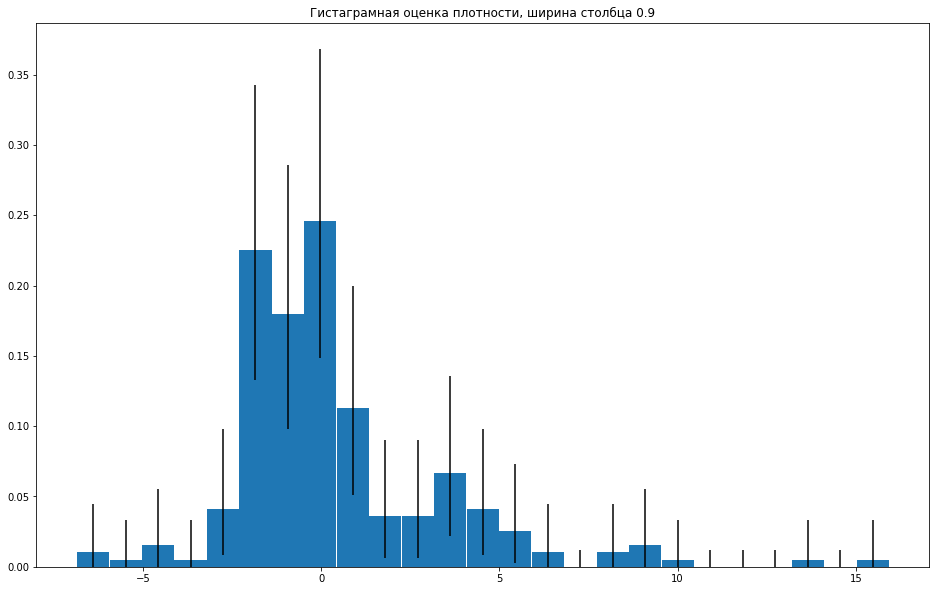

In [12]:
def J(bins, h):
    n = bins.sum()
    return 2 / ((n - 1) * h) - (n + 1) / (h * (n - 1)) * np.sum(bins ** 2) 

a = X.min()
b = X.max()

best_h = 0
best_J = -np.inf
best_bins = 0

for h in np.linspace(0.1, 5, 50):
    bins = np.histogram(X, density=True, bins = int((b - a)//h))
    j = J(bins[0], h)
    if j > best_J:
        best_J = j
        best_h = h
        best_bins = bins


m = best_bins[0].size
c = -sts.norm.ppf(0.025/m) * np.sqrt(m/X.size/(b-a)) / 2
l = np.max([np.sqrt(best_bins[0]) - c, np.zeros(m)], axis=0)**2
u = np.min([np.sqrt(best_bins[0]) + c, np.ones(m)], axis=0)**2

plt.figure(figsize=(16, 10))
plt.bar(x=best_bins[1][:-1] + best_h/2, 
        height=best_bins[0], 
        width=best_h,
        yerr=(best_bins[0] - l, u - best_bins[0]))
plt.title('Гистаграмная оценка плотности, ширина столбца {}'.format(best_h))
plt.show()

In [13]:
cv = GridSearchCV(estimator=KernelDensity(), 
                  param_grid={'bandwidth' : np.linspace(0.1, 5, 50)}, 
                  cv=10)
cv.fit(X)

x_plot = np.linspace(-10, 20, 300)
y_plot = np.exp(cv.best_estimator_.score_samples(x_plot.reshape(x_plot.size, 1)))
h = cv.best_params_['bandwidth']
n = X.size

def se(x):
    Y_mean = np.mean([sts.norm.pdf((x-X.T[0][i])/h)/h for i in range(n)])
    return 1/np.sqrt(n*(n-1)) * np.linalg.norm([sts.norm.pdf((x-X.T[0][i])/h)/h - Y_mean for i in range(n)])

se_plot = np.array([se(x) for x in x_plot])
q = sts.norm.ppf((1 + 0.05**(3*h/(b-a)))/2)

l = y_plot - q * se_plot
u = y_plot + q * se_plot

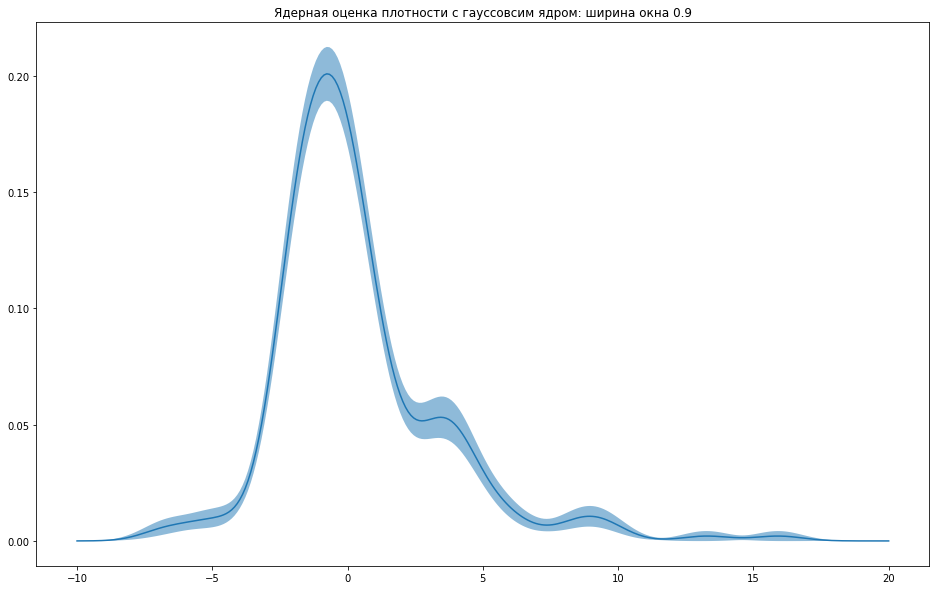

In [14]:
plt.figure(figsize=(16, 10))
plt.fill_between(x_plot, l, u, alpha=0.5)
plt.plot(x_plot, y_plot)
plt.title('Ядерная оценка плотности с гауссовсим ядром: ширина окна {}'.format(cv.best_params_['bandwidth']))
plt.show()